<a href="https://colab.research.google.com/github/amzangi/datasciencecoursera/blob/master/Chapter_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import re

### Pandas Series Object

In [ ]:
# Series wraps both a sequence of values and a sequence of indices, 
# which we can access with the values and index attributes.
x1 = pd.Series([1.35,2,3.25,4,5])
print(x1)

0    1.35
1    2.00
2    3.25
3    4.00
4    5.00
dtype: float64


In [ ]:
x1.values, x1.index

(array([1.35, 2.  , 3.25, 4.  , 5.  ]), RangeIndex(start=0, stop=5, step=1))

In [ ]:
x1[0]

1.35

In [ ]:
x1[1:3]

1    2.00
2    3.25
dtype: float64

In [ ]:
# Pd Series object is basically interchangeable with a one-dimensional NumPy array. 
# However, numpy has implicitly defined integer index while pd series has explicitly defined index. 
# For example, index can be other than integer
x2 = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(x2)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [ ]:
# Noncontiguous or nonsequential indices.
x3 = pd.Series([0.25, 0.5, 0.75, 1.0],index=[2, 5, 3, 7])
print(x3)

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64


In [ ]:
x2['b'], x3[3]

(0.5, 0.75)

In [ ]:
# Series also supports array-style operations such as slicing
x2['b':'d']

b    0.50
c    0.75
d    1.00
dtype: float64

#### Constructing Series objects

In [ ]:
pd.Series([2, 4, 6]) # no index

0    2
1    4
2    6
dtype: int64

In [ ]:
pd.Series(5, index=[100, 200, 300]) # scalar

100    5
200    5
300    5
dtype: int64

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'}) # dictionary

2    a
1    b
3    c
dtype: object

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) # index explicitly asking only for 3 and 2

3    c
2    a
dtype: object

### Pandas DataFrame Object

In [ ]:
# DataFrame is a sequence of aligned Series objects. Here, by “aligned” we mean that they share the same index.
x3_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
x4_dict = {'California': 38332521,'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135}
print(x3_dict)
print(x4_dict)

{'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
{'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135}


In [ ]:
# Changing to Series
x3_series = pd.Series(x3_dict)
x4_series= pd.Series(x4_dict)
print(x3_series)
print(x4_series)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [ ]:
# using a dictionary to construct a single two-dimensional object
x3_df= pd.DataFrame({'population': x4_series,'area': x3_series})
print(x3_df)

            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


In [ ]:
print(x3_df.index) # DataFrame has an index attribute giving access to the index labels.
print(x3_df.columns) # DataFrame has an columns attribute, an index object holding columns labels

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')


In [ ]:
x3_df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Constructing DataFrame objects

In [ ]:
pd.DataFrame(data=x3_series,columns=['popul']) # From a single Series object.

,popul
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [ ]:
pd.DataFrame([{'a':i , 'b':i ** 2} for i in range(3)]) # From a list of dicts.

,a,b
0,0,0
1,1,1
2,2,4


In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}]) # # Even if some keys in the dictionary are missing

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [ ]:
pd.DataFrame({'population': x4_series,'area': x3_series}) # From a dictionary of Series objects.

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c']) #From a two-dimensional NumPy array.

,foo,bar
a,0.352954,0.561018
b,0.337823,0.015941
c,0.636249,0.859814


In [ ]:
pd.DataFrame(np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')]))

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### Pandas Index Object

In [ ]:
# Index as immutable array
ind_x1 = pd.Index([2, 3, 5, 7, 11])
ind_x1[1] = 0 #immutability makes it safer to share indices between multiple DataFrames.

TypeError: Index does not support mutable operations

In [ ]:
# Index as ordered set
ind_x2 = pd.Index([1, 3, 5, 7, 9])
ind_x3 = pd.Index([2, 3, 5, 7, 11])
ind_x2 & ind_x3 # intersection

In [ ]:
ind_x2 | ind_x3 # union

In [ ]:
ind_x2 ^ ind_x3 # symmetric difference

NameError: name 'ind_x2' is not defined

### Data Selection in Series

In [ ]:
# Series as Dictionary
x5_series = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
x5_series['b']

In [ ]:
'a' in x5_series

In [ ]:
list(x5_series.items())

In [ ]:
print(x5_series)
x5_series['a'] = 1.25 #easy mutability of the objects
print(x5_series)

In [ ]:
# Series as one-dimensional array
x5_series['a':'c'] # slicing by explicit index. Final index included.

NameError: name 'x5_series' is not defined

In [ ]:
x5_series[0:2] # slicing by implicit integer index. Final index NOT included.

In [ ]:
x5_series[(x5_series > 0.25) & (x5_series < 0.85)] # masking

In [ ]:
x5_series[['a','d']] # fancy idnexing

In [ ]:
# Indexers: loc, iloc, and ix
x6_series = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
x6_series

In [ ]:
x6_series.loc[1:5], x6_series.loc[3:4]  # loc always references the explicit index. 

In [ ]:
x6_series.iloc[1:5], x6_series.iloc[3:4] # iloc always references the implicit index

### Data Selection in DataFrame

In [ ]:
# DataFrame as a dictionary
x7_df = pd.DataFrame({'area': x3_series, 'population': x4_series})
x7_df

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
x7_df['area'] # dictionary-style indexing

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
x7_df.area # attribute-style access

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
x7_df['density'] = x7_df['population']/x7_df['area'] # modifying the object
x7_df

,area,population,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# DataFrame as two-dimensional array
x7_df.values # raw underlying data array using the values attribute

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
x7_df.values[0] # index to an array accesses a row

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [ ]:
x7_df['area'] # passing a single “index” to a DataFrame accesses a column:

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
x7_df.T # transpose the full DataFrame to swap rows and columns

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
x7_df

,area,population,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# Indexers: loc, iloc, and ix
x7_df.iloc[:4,:2]

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [ ]:
x7_df.loc[:'Florida', :'population']

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [ ]:
x7_df.ix[:4]

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
x7_df.loc[x7_df.density > 100, ['population', 'density']] # combining masking and fancy indexing

In [ ]:
x7_df.iloc[0,2] = 90 # modifying values;
x7_df

In [ ]:
x7_df[1:3] # slices referring to rows by number

In [ ]:
x7_df[x7_df.density > 100] # masking operations are also interpreted row-wise

### Ufuncs: Index Preservation

In [ ]:
rng = np.random.RandomState(42)
x8_series = pd.Series(rng.randint(0, 10, 4))
x8_series

0    6
1    3
2    7
3    4
dtype: int32

In [ ]:
x8_df = pd.DataFrame(rng.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
x8_df

In [ ]:
# NumPy ufunc will result in another Pandas object with the indices preserved
np.exp(x8_series)

In [ ]:
# # NumPy ufunc will result in another Pandas object with the indices preserved
np.sin(x8_df * np.pi/4)

### UFuncs: Index Alignment

In [ ]:
# Index alignment in Series
x9_series1 = pd.Series({'Alaska': 1723337, 'Texas': 695662,'California': 423967}, name='area')
x9_series2 = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')
print(x9_series1)
print(x9_series2)

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64
California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64


In [ ]:
x9_series2/x9_series1 # union of indices of the two input arrays

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [ ]:
# Index alignment in DataFrame
x9_df1 = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
x9_df1

,A,B
0,6,18
1,10,10


In [ ]:
x9_df2 = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
x9_df2

In [ ]:
x9_df1 + x9_df2 # indices are aligned correctly

In [ ]:
# pass any desired fill_value to be used in place of missing entries
fill = x9_df1.stack().mean() # 9.5
x9_df1.add(x9_df2, fill_value = fill)

### Ufuncs: Operations Between DataFrame and Series

In [ ]:
# Operations between a DataFrame and a Series, the index and column alignment is similarly maintained. 
# Operations between a DataFrame and a Series are similar to operations between a 2-D and 1-D NumPy array.

x10_series = rng.randint(10, size=(3, 4))
x10_series, x10_series[0]

In [ ]:
x10_series - x10_series[0] # subtraction between a 2-D array and one of its rows is applied row-wise.

In [ ]:
x10_df = pd.DataFrame(x10_series, columns = list('QPRS'))
print(x10_df)
print(x10_df.iloc[0])

In [ ]:
x10_df - x10_df.iloc[0] # in Pandas, it is row_wise by default

NameError: name 'x10_df' is not defined

In [ ]:
x10_df.subtract(x10_df['R'], axis = 0) # column-wise

In [ ]:
x10_df.iloc[0,2]

In [ ]:
x10_df - x10_df.iloc[0,::2]

### Handling Missing Data
#### Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating point NaN value, and the Python None object.

In [ ]:
# None and NAN in Numpy
x11 = np.array([1, None, 3, 4])
x11

In [ ]:
x11.sum() # addition between an integer and None is undefined.

In [ ]:
# NaN (acronym for Not a Number), standard IEEE floating-point representation.
x12 = np.array([1, np.nan, 3, 4])
x12.dtype

dtype('float64')

In [ ]:
x12 + 1

array([ 2., nan,  4.,  5.])

In [ ]:
np.nan + 1 # the result of arithmetic with NaN will be another NaN.

nan

In [ ]:
# None and NAN in Pandas
x13 = pd.Series([1, np.nan, 2, None]) # Pandas is built to handle the two of them nearly interchangeably,
x13

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
# Detecting null values
x14 = pd.Series([1, np.nan, 'hello', None])
x14.isnull() # Boolean mask over the data.

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
x14[x14.notnull()] # Boolean masks can be used directly as a Series or DataFrame index

0        1
2    hello
dtype: object

In [ ]:
# Dropping null values
x14.dropna() # For series

0        1
2    hello
dtype: object

In [ ]:
x15_df = pd.DataFrame([[1, np.nan, 2],[2, 3, 5],[np.nan, 4, 6]])
x15_df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# We cannot drop single values from a DataFrame; we can only drop full rows or full columns.
x15_df.dropna() # rows dropped

,0,1,2
1,2.0,3.0,5


In [ ]:
x15_df.dropna(axis = 'columns') # columns dropped

,2
0,2
1,5
2,6


In [ ]:
x15_df[3] = np.nan
x15_df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
x15_df.dropna(axis = 'columns', how = 'all') # drop rows/columns that are all null values.

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
x15_df.dropna(axis = 'rows', thresh=3) # specifying a minimum number of non-null values for the row/column to be kept

,0,1,2,3
1,2.0,3.0,5,NaN


In [ ]:
x16_series = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
x16_series

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
x16_series.fillna(0) # filling with 0

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [ ]:
x16_series.fillna(method='ffill') # forward-fill

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
x16_series.fillna(method='bfill') #backward-fill

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [ ]:
x15_df.fillna(method = 'ffill', axis = 1) # for Dataframes we can specify axis.
# previous value is not available during a forward fill, the NA value remains.

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Multiply Indexed Series

In [ ]:
# Bad Way. Using Python tuples.
x16_index = [('California', 2000), ('California', 2010), 
         ('New York', 2000), ('New York', 2010), 
         ('Texas', 2000), ('Texas', 2010)]
x16_population = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
x16_series = pd.Series(x16_population, index = x16_index)
x16_series

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [ ]:
# Slicing
x16_series[('California', 2010):('Texas', 2000)] # Not efficient, especially if you want all enteries for 2010.

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [ ]:
# Better way: Pandas MultiIndex
x16_index_2 = pd.MultiIndex.from_tuples(x16_index)
x16_index_2

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [ ]:
x16_series_2 = x16_series.reindex(x16_index_2)
x16_series_2

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Better Slicing
x16_series_2[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [ ]:
# Extra dimension. The unstack() will convert a multiplyindexed Series into a conventionally indexed DataFrame.
x16_df = x16_series_2.unstack()
x16_df


,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
# Similarly an opposite operation.
x16_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Ading an aother column is easy.
x16_df_2 = pd.DataFrame({'total'  : x16_series_2, 
                         'under18': [9267089, 9284094,4687374, 4318033, 5906301, 6879014]})
x16_df_2

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [ ]:
# ufuncs and other functionalities are available.
x16_df_2['under18']/x16_df_2['total']

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

#### Methods of MultiIndex Creation

In [ ]:
# Passing a list of two or more index arrays to the constructor.
x17_df = pd.DataFrame(np.random.rand(4, 2),
                    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns=['data1', 'data2'])
x17_df # The work of creating the MultiIndex is done in the background.

data1     data2
a 1  0.423523  0.342680
  2  0.081227  0.323626
b 1  0.287135  0.006494
  2  0.514456  0.728770

In [ ]:
# Passing a dictionary with appropriate tuples as keys.
x18 = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(x18) # Pandas will automatically recognize this and use a MultiIndex by default.

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
# Explicit MultiIndex constructors
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]) # from array

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)]) # from tuples

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]]) # From a Cartesian product of single indices:

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
# MultiIndex level names
x16_series_2.index.names = ['state', 'year']
x16_series_2

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# MultiIndex for columns
x19_index   = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
x19_columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])

# mocking the data
x19_data = np.round(np.random.randn(4, 6), 1)
x19_data[:, ::2] *= 10
x19_data += 37

# creating data frame
x19_df = pd.DataFrame(x19_data, index = x19_index, columns = x19_columns)
x19_df

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      25.0  37.3  24.0  36.9  50.0  36.9
     2      35.0  36.4  41.0  37.0  47.0  37.3
2014 1      47.0  35.0  36.0  36.8  33.0  34.7
     2      37.0  37.0  42.0  36.3  26.0  36.1

In [ ]:
# get a full Data Frame containing just that person’s information
x19_df['Bob']

type          HR  Temp
year visit            
2013 1      25.0  37.3
     2      35.0  36.4
2014 1      47.0  35.0
     2      37.0  37.0

#### Indexing multiply indexed Series

In [ ]:
x16_series_2

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# accessing single elements
x16_series_2['California', 2000]

33871648

In [ ]:
# indexing one of the levels
x16_series_2['California']

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
# Partial slicing is available as well, as long as the MultiIndex is sorted
x16_series_2.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
# partial indexing on lower levels
x16_series_2[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [ ]:
# Selection based on Boolean masks.
x16_series_2[x16_series_2 > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [ ]:
# Selection based on fancy indexing
x16_series_2[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
#### Indexing multiply indexed Data Frame
x19_df

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      25.0  37.3  24.0  36.9  50.0  36.9
     2      35.0  36.4  41.0  37.0  47.0  37.3
2014 1      47.0  35.0  36.0  36.8  33.0  34.7
     2      37.0  37.0  42.0  36.3  26.0  36.1

In [ ]:
# Columns are primary in a DataFrame.
x19_df['Guido', 'HR']

year  visit
2013  1        24.0
      2        41.0
2014  1        36.0
      2        42.0
Name: (Guido, HR), dtype: float64

In [ ]:
x19_df.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      25.0  37.3
     2      35.0  36.4

In [ ]:
x19_df.loc[:, ('Bob','HR')]

year  visit
2013  1        25.0
      2        35.0
2014  1        47.0
      2        37.0
Name: (Bob, HR), dtype: float64

In [ ]:
# Using indexSlice to slice wihin the tuple. x19_df.loc[(:, 1), (:, 'HR')] will throw error.
x19_df.loc[
            pd.IndexSlice[:,1],
            pd.IndexSlice[:,'HR']
]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,25.0,24.0,50.0
2014,1,47.0,36.0,33.0


### Rearranging Multi-Indices

#### Many of the MultiIndex slicing operations will fail if the index is not sorted.

In [ ]:
x20_index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
x20_series = pd.Series(np.random.rand(6), index=x20_index)
x20_series.index.names = ['char', 'int']
x20_series

char  int
a     1      0.237619
      2      0.501248
c     1      0.608313
      2      0.448826
b     1      0.262092
      2      0.024819
dtype: float64

In [ ]:
x20_series['a':'b']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [ ]:
# Pandas provides a number of convenience routines to perform lexographical sorting.
x20_series = x20_series.sort_index()
x20_series

In [ ]:
x20_series['a':'b']

In [ ]:
# Stacking and unstacking indices
x16_series_2

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
x16_series_2.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [ ]:
x16_series_2.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
x16_series_2.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Index setting and resetting
x16_series_3 = x16_series_2.reset_index(name = 'population')
x16_series_3

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
x16_series_3.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices

In [ ]:
x19_df

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      25.0  37.3  24.0  36.9  50.0  36.9
     2      35.0  36.4  41.0  37.0  47.0  37.3
2014 1      47.0  35.0  36.0  36.8  33.0  34.7
     2      37.0  37.0  42.0  36.3  26.0  36.1

In [ ]:
x19_df_mean = x19_df.mean(level='year')
x19_df_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     30.0  36.85  32.5  36.95  48.5  37.1
2014     42.0  36.00  39.0  36.55  29.5  35.4

In [ ]:
x19_df_mean.mean(axis = 1, level='type')

type,HR,Temp
year,,
2013,37.000000,36.966667
2014,36.833333,35.983333


### Concat and Append

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
        for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
x21_series = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
x22_series = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([x21_series, x22_series]) # concatenating series

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
x21_df = make_df('AB', [1, 2])
x22_df = make_df('AB', [3, 4])
print(x21_df); print(x22_df)

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


In [ ]:
pd.concat([x21_df, x22_df]) # concatenating dataframes row wise

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [ ]:
x23_df = make_df('AB', [1, 2])
x24_df = make_df('CD', [3, 4])
print(x23_df); print(x24_df)

    A   B
1  A1  B1
2  A2  B2
    C   D
3  C3  D3
4  C4  D4


In [ ]:
pd.concat([x23_df, x24_df], axis=1) # concatenating dataframes column wise

,A,B,C,D
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,C3,D3
4,NaN,NaN,C4,D4


In [ ]:
# Duplicate indices
x21_df.index = x22_df.index
pd.concat([x21_df, x22_df]) # repeated indices in the result.

,A,B
3,A1,B1
4,A2,B2
3,A3,B3
4,A4,B4


In [ ]:
# Simply catching the repeats as an error by verify_integrity flag.
try:
    pd.concat([x21_df,x22_df], verify_integrity = True)
except ValueError as e:
    print("ValueError", e)

ValueError Indexes have overlapping values: Int64Index([3, 4], dtype='int64')


In [ ]:
# Ignoring the index
pd.concat([x21_df, x22_df], ignore_index=True)

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4


In [ ]:
# Adding MultiIndex keys to achieve hierarchical indexed series
pd.concat([x21_df, x22_df], keys=['x','y'])

A   B
x 3  A1  B1
  4  A2  B2
y 3  A3  B3
  4  A4  B4

In [ ]:
# Concatenation with joins
x25_df = make_df('ABC', [1,2])
x26_df = make_df('BCD', [3,4])
print(x25_df); print(x26_df); pd.concat([x25_df, x26_df])

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [ ]:
pd.concat([x25_df, x26_df], join='inner') # intersection of columns

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [ ]:
# Using append() method
print(x21_df) ; print(x22_df) ; print(x21_df.append(x22_df)) # specifying the returned columns

    A   B
3  A1  B1
4  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
3  A1  B1
4  A2  B2
3  A3  B3
4  A4  B4


### Joining Datasets

In [ ]:
x27_df = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                       'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
x28_df = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                       'hire_date': [2004, 2008, 2012, 2014]})
print(x27_df); print(x28_df)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
# One-to-one joins
x29_df = pd.merge(x27_df, x28_df) # a new df with a new order and idnex.
x29_df

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
x30_df = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
print(x29_df); print(x30_df)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [ ]:
# Many-to-one joins
pd.merge(x29_df, x30_df) # information repeated in the additional column (i.e. supervisor).

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [ ]:
x31_df = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
              'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
print(x27_df); print(x31_df)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


In [ ]:
# Many-to-many joins
pd.merge(x27_df, x31_df) # Key column (i.e. group) has duplicates which will result in many to many.

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


#### Specification of the Merge Key in the joins

In [ ]:
# The on keyword
print(x27_df); print(x28_df); print(pd.merge(x27_df,x28_df, on = 'employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [ ]:
# The left_on and right_on keywords
x32_df = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})

# identifying the names of the columns in both dataframes, since names are different.
print(x27_df); print(x32_df); print(pd.merge(x27_df, x32_df, left_on='employee', right_on='name'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [ ]:
# redundant column of "name" can be dropped
pd.merge(x27_df, x32_df, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [ ]:
# The left_index and right_index keywords
x27_df2 = x27_df.set_index('employee') 
x28_df2 = x28_df.set_index('employee')

# Using index as a key for merge
print(x27_df2); print(x28_df2); print(pd.merge(x27_df2, x28_df2, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [ ]:
# Similarly we can use 'join' which is the merge on indices
print(x27_df2); print(x28_df2); print(x27_df2.join(x28_df2))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [ ]:
# mixing indices and columns.
print(x27_df2); print(x32_df);(pd.merge(x27_df2, x32_df, left_index = True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


#### Types of Joins

In [ ]:
x33_df = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],'food': ['fish', 'beans', 'bread']},columns=['name', 'food'])
x34_df = pd.DataFrame({'name': ['Mary', 'Joseph'],'drink': ['sherbat', 'chai']},columns=['name', 'drink'])
print(x33_df); print(x34_df)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name    drink
0    Mary  sherbat
1  Joseph     chai


In [ ]:
pd.merge(x33_df, x34_df, how = 'inner')

,name,food,drink
0,Mary,bread,sherbat


In [ ]:
pd.merge(x33_df, x34_df, how = 'outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,sherbat
3,Joseph,NaN,chai


In [ ]:
pd.merge(x33_df, x34_df, how = 'left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,sherbat


In [ ]:
pd.merge(x33_df, x34_df, how = 'right')

,name,food,drink
0,Mary,bread,sherbat
1,Joseph,NaN,chai


#### Overlapping Column Names

In [ ]:
x35_df = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [1, 2, 3, 4]})
x36_df = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'rank': [3, 1, 4, 2]})
print(x35_df); print(x36_df)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


In [ ]:
pd.merge(x35_df, x36_df, on = 'name') # conflicting column name 'rank'

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [ ]:
pd.merge(x35_df, x36_df, on='name', suffixes = ['_L', '_R']) # adding a custom suffix

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### Aggregation and Grouping

In [ ]:
planets = pd.read_csv('planets.csv')
planets.shape

(1035, 6)

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


#### Simple Aggregation

In [ ]:
x37_series = pd.Series(rng.rand(5))
x37_series

0    0.866176
1    0.601115
2    0.708073
3    0.020584
4    0.969910
dtype: float64

In [ ]:
x37_series.sum(), x37_series.mean() # For a Pandas Series the aggregates return a single value.

(3.165858081771986, 0.6331716163543972)

In [ ]:
x37_df = pd.DataFrame({'A':rng.rand(5), 'B':rng.rand(5)})    
print(x37_df)

          A         B
0  0.065052  0.097672
1  0.948886  0.684233
2  0.965632  0.440152
3  0.808397  0.122038
4  0.304614  0.495177


In [ ]:
print(x37_df.mean()) # For a Pandas Datafarame the aggregates return within each column by default.

A    0.618516
B    0.367855
dtype: float64


In [ ]:
print(x37_df.mean(axis = 'columns')) # By specifying the axis argument, you can instead aggregate within each row.

0    0.081362
1    0.816559
2    0.702892
3    0.465218
4    0.399895
dtype: float64


In [ ]:
# The method describe() computes several common aggregates.
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


#### Split, apply, combine

<img src="Groupby.png" height="800" width="600">

In [ ]:
x38_df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data': range(6)}, columns=['key', 'data'])
x38_df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
x38_df.groupby('key')# First splitting

# This DataFrameGroupBy object is where the magic is: you can think of it as a special view of the DataFrame. 
# It is poised to dig into the groups but does no actual computation until the aggregation is applied.

In [ ]:
x38_df.groupby('key').sum() # Then, applying/combining

# any valid aggregate operation can be performed.

,data
key,
A,3
B,5
C,7


In [ ]:
# Here we’ve selected a particular Series group from the original DataFrame group by reference to its column name.
planets.groupby('method')['orbital_period'] .median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
# Similarly describe() method of DataFrames to perform a set of aggregations that describe each group in the data.
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


#### Aggregate, filter, transform, apply

In [ ]:
x39_df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                        'data1': range(6), 
                        'data2': rng.randint(0, 10, 6)},
                        columns = ['key', 'data1', 'data2'])
x39_df

,key,data1,data2
0,A,0,1
1,B,1,5
2,C,2,5
3,A,3,9
4,B,4,3
5,C,5,5


In [ ]:
# Aggregation
x39_df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     1      5   9
B       1    2.5   4     3      4   5
C       2    3.5   5     5      5   5

In [ ]:
# To pass a dictionary, mapping column names to operations.
x39_df.groupby('key').aggregate({'data1':'min', 'data2':'max'})

,data1,data2
key,,
A,0,9
B,1,5
C,2,5


In [ ]:
# Filtering

def filter_func(x):
    return x['data2'].std() > 4

print(x39_df); print(x39_df.groupby('key').std()); print(x39_df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      1
1   B      1      5
2   C      2      5
3   A      3      9
4   B      4      3
5   C      5      5
       data1     data2
key                   
A    2.12132  5.656854
B    2.12132  1.414214
C    2.12132  0.000000
  key  data1  data2
0   A      0      1
3   A      3      9


In [ ]:
# Transformation
print(x39_df.groupby('key').mean()); print(x39_df.groupby('key').transform(lambda x: x - x.mean()))

     data1  data2
key              
A      1.5      5
B      2.5      4
C      3.5      5
   data1  data2
0   -1.5   -4.0
1   -1.5    1.0
2   -1.5    0.0
3    1.5    4.0
4    1.5   -1.0
5    1.5    0.0


In [ ]:
# The apply() method.

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

print(x39_df); print(x39_df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      1
1   B      1      5
2   C      2      5
3   A      3      9
4   B      4      3
5   C      5      5
  key  data1  data2
0   A  0.000      1
1   B  0.125      5
2   C  0.200      5
3   A  0.300      9
4   B  0.500      3
5   C  0.500      5


#### A list, array, series, or index providing the grouping keys within Group By

In [ ]:
# A List of keys
L = [0, 0, 1, 1, 2, 2]
print(x39_df); print(x39_df.groupby(L).sum())

  key  data1  data2
0   A      0      1
1   B      1      5
2   C      2      5
3   A      3      9
4   B      4      3
5   C      5      5
   data1  data2
0      1      6
1      5     14
2      9      8


In [ ]:
# A dictionary or series mapping index to group.
x39_df_2 = x39_df.set_index('key') # Setting index
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(x39_df_2); print(x39_df_2.groupby(mapping).sum())

     data1  data2
key              
A        0      1
B        1      5
C        2      5
A        3      9
B        4      3
C        5      5
           data1  data2
consonant     12     18
vowel          3     10


In [ ]:
# Any Python function.
print(x39_df_2); print(x39_df_2.groupby(str.lower).mean())

     data1  data2
key              
A        0      1
B        1      5
C        2      5
A        3      9
B        4      3
C        5      5
   data1  data2
a    1.5      5
b    2.5      4
c    3.5      5


In [ ]:
# key choices can be combined to group on a multi-index
x39_df_2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,5
b,consonant,2.5,4
c,consonant,3.5,5


In [ ]:
# Grouping example
decade = 10 * (planets['year'] // 10) # // means 'divide with integral result (discard remainder)'
decade = decade.astype(str) + 's' # make 'decade' as string and add 's' at the end
decade.name = 'decade'

planets.groupby(['method', decade])['number'].sum().fillna(0) # sum planets for each decade for each method

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [ ]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0) # another view for the same result

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Pivot Tables

In [ ]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Pivot Tables by Hand
titanic.groupby('sex')[['survived']].mean() # survival rate by gender

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()# survival rate of both sex and class

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# Pivot Table Syntax
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# Multilevel pivot tables
age = pd.cut(titanic['age'],[0,18,80]) # create bins for age
titanic.pivot_table('survived', ['sex', age], 'class') # row wise

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
fare = pd.cut(titanic['fare'],2) # create bins for fare
titanic.pivot_table('survived', ['sex', age], ['class', fare]) # adding column

class                       First                               Second  \
fare            (-0.512, 256.165] (256.165, 512.329] (-0.512, 256.165]   
sex    age                                                               
female (0, 18]           0.900000                1.0          1.000000   
       (18, 80]          0.971429                1.0          0.900000   
male   (0, 18]           0.800000                NaN          0.600000   
       (18, 80]          0.369565                0.5          0.071429   

class                       Third  
fare            (-0.512, 256.165]  
sex    age                         
female (0, 18]           0.511628  
       (18, 80]          0.423729  
male   (0, 18]           0.215686  
       (18, 80]          0.133663

In [ ]:
# aggfunc
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
# total
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### Example : Birthrate Data

In [ ]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [ ]:
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


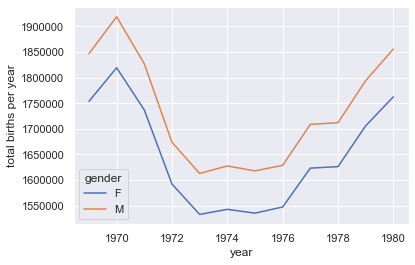

In [ ]:
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

### Vectorized String Operations

In [ ]:
x40 = ['Graham Chapman', None, 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'] # an array
names = pd.Series(x40) 
names.str.capitalize() # Pnadas will perform same operation on each element and will take care of missing data.

0    Graham chapman
1              None
2     Terry gilliam
3         Eric idle
4       Terry jones
5     Michael palin
dtype: object

In [ ]:
names.str.lower()

0    graham chapman
1              None
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [ ]:
names.str.len()

0    14.0
1     NaN
2    13.0
3     9.0
4    11.0
5    13.0
dtype: float64

In [ ]:
names.str.startswith('T')

0    False
1     None
2     True
3    False
4     True
5    False
dtype: object

In [ ]:
names.str.split()

0    [Graham, Chapman]
1                 None
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [ ]:
names.str.extract('([A-Za-z]+)') # Getting contiguous group of characters

,0
0,Graham
1,NaN
2,Terry
3,Eric
4,Terry
5,Michael


In [ ]:
names.str.findall(r'^[^AEIOU].*[^aeiou]$') # finding names that start & end with consonant.

0    [Graham Chapman]
1                None
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [ ]:
names.str[0:3] # slicing

0     Gra
1    None
2     Ter
3     Eri
4     Ter
5     Mic
dtype: object

In [ ]:
names.str.split().str.get(-1) # last name of each entry

0    Chapman
1       None
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Example: Recipe Database

In [ ]:
try:
    pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)
    
# each line is itself a valid JSON, but the full file is not

ValueError: Trailing data


In [ ]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

# apparently each line is a json

(2, 12)

In [ ]:
# read the entire file into a Python array
with open('recipeitems-latest.json', 'r', encoding="utf8") as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [ ]:
recipes.shape

(173278, 17)

In [ ]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [ ]:
# Lets extract the ingredients list
recipes.ingredients.str.len().describe()

# The ingredient lists average 250 characters long, with a minimum of 0 and a maximum of nearly 10,000 characters!

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [ ]:
recipes.name[np.argmax(recipes.ingredients.str.len())] # longest ingredients list

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [ ]:
recipes.description.str.contains('[Bb]reakfast').sum() # Count of Breakfast recipes

3524

In [ ]:
recipes.ingredients.str.contains('[Cc]innamon').sum() # Count of recipes with cinnamon

10526

In [ ]:
recipes.ingredients.str.contains('[Cc]inamon').sum() # Count of recipes with misspelled 'cinamon'

11

In [ ]:
# Lets see for the spices in the receipes
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [ ]:
spice_df = pd.DataFrame(
                        dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                        for spice in spice_list)) # whether this spice appears in the gradients 
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [ ]:
selection = spice_df.query('parsley & paprika & tarragon') # Count of recipes that uses parsley, paprika, and tarragon
print(selection) # 10 recipes

         salt  pepper  oregano   sage  parsley  rosemary  tarragon  thyme  \
2069    False    True    False  False     True     False      True  False   
74964   False   False    False  False     True     False      True  False   
93768    True    True    False   True     True     False      True  False   
113926   True    True    False  False     True     False      True  False   
137686   True    True    False  False     True     False      True  False   
140530   True    True    False  False     True     False      True   True   
158475   True    True    False  False     True     False      True  False   
158486   True    True    False  False     True     False      True  False   
163175   True    True     True  False     True     False      True  False   
165243   True    True    False  False     True     False      True  False   

        paprika  cumin  
2069       True  False  
74964      True  False  
93768      True  False  
113926     True  False  
137686     True  False  
14

In [ ]:
# Lets discover those recipes which contains 
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

### Working with Time Series

#### Native Python dates and times: datetime and dateutil

In [ ]:
# They are pretty flexible but will fail for large array of dates and times.

from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
from dateutil import parser
date1 = parser.parse("4th of July, 2015")
date1

datetime.datetime(2015, 7, 4, 0, 0)

In [ ]:
date1.strftime('%A')

'Saturday'

#### Typed arrays of times: NumPy’s datetime64

In [ ]:
# The weaknesses of Python’s datetime format led to datetime64 dtype.

date2 = np.array('2015-07-04', dtype=np.datetime64) # specific format
date2

array('2015-07-04', dtype='datetime64[D]')

In [ ]:
date2 + np.arange(12) # quick vectorized operations

# datetime64 data type addresses some of the deficiencies of the built-in Python datetime type, 
#it lacks many of the convenient methods and functions provided by datetime and especially dateutil.

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

#### Dates and times in Pandas: Best of both worlds

In [ ]:
# We can use Pandas tools to repeat the demonstration from above.
date3 = pd.to_datetime("4th of July, 2015")
date3

Timestamp('2015-07-04 00:00:00')

In [ ]:
date3.strftime('%A')

'Saturday'

In [ ]:
date3 + pd.to_timedelta(np.arange(12), 'D') # Vectorized operation

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [ ]:
# Where the Pandas time series tools really become useful is when you begin to index data by timestamps.

index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
x40_series = pd.Series([0, 1, 2, 3], index=index)
x40_series

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
x40_series['2014-07-04':'2015-07-04'] # Since we have it in series, now we can make use of series index patterns.

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [ ]:
x40_series['2015'] # date only index options 

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [ ]:
# For time stamps, Pandas provides the Timestamp type.The associated index structure is DatetimeIndex.
# For time periods, Pandas provides the Period type. The associated index structure is PeriodIndex.
# For time deltas or durations, Pandas provides the Timedelta type. The associated index structure is TimedeltaIndex.

In [ ]:
date4 = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015 ', '20150708'])
date4 # passing a series of dates by default yields a DatetimeIndex

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
date4.to_period('D') # Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [ ]:
# A TimedeltaIndex is created, for example, when one date is subtracted from another
date4 - date4[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: pd.date_range()

In [ ]:
# Regular date sequences can be created . pd.date_range() for timestamps, pd.period_range() for periods, and
#  pd.timedelta_range() for time deltas.

pd.date_range('2015-07-03', '2015-07-10') # Default frequency is 1 Day

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8, freq='H') # altering freq argument

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
pd.period_range('2015-07', periods=8, freq='M') # monthly periods

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [ ]:
pd.timedelta_range(0, periods=10, freq='H') # duratiosn increase by hour

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T") # for a frequency of 2 hours 30 minutes, we can combine Hour & Minute

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

### Resampling, Shifting, and Windowing

In [ ]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
data_source='google')
goog.head()

ModuleNotFoundError: No module named 'pandas_datareader'